<a href="https://colab.research.google.com/github/Daryna-Ruban/Machine-learning/blob/main/%D0%A0%D1%83%D0%B1%D0%B0%D0%BD_%D0%9B%D0%913_24_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Лабораторна робота 3
**Завдання 1. Завантажити Diabetes Dataset (бібліотека Sklearn)**
1. Вивести перших 5 рядків.

In [6]:
# Імпортуємо необхідні модулі
from sklearn.datasets import load_diabetes
import pandas as pd

# Завантажуємо датасет
diabetes_data = load_diabetes()

# Перетворюємо на DataFrame для зручності перегляду
diabetes_df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)

# Додаємо колонку з мітками (цільовими значеннями)
diabetes_df['target'] = diabetes_data.target

# Виведемо перші 5 рядків даних
print(diabetes_df.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


2. Перевірити наявність пропусків. У разі виявлення замінити на
середнє значення.

In [8]:
# Перевіримо наявність пропусків у даних
print("Кількість пропусків у кожній колонці:")
print(diabetes_df.isnull().sum())

# Якщо є пропуски, замінюємо їх на середнє значення по колонці
diabetes_df.fillna(diabetes_df.mean(), inplace=True)

# Повторно перевіримо наявність пропусків після заміни
print("\nПісля заміни пропусків:")
print(diabetes_df.isnull().sum())

# Виведемо перші 5 рядків після обробки
print("\nПерші 5 рядків даних після перевірки та обробки пропусків:")
print(diabetes_df.head())

Кількість пропусків у кожній колонці:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Після заміни пропусків:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Перші 5 рядків даних після перевірки та обробки пропусків:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.00259

3. Перевірити наявність дублікатів, при виявленні – видалити.

In [9]:
# Перевіряємо наявність дублікатів
duplicates = diabetes_df.duplicated()
print(f"Кількість дублікатів: {duplicates.sum()}")

# Видаляємо дублікати, якщо вони є
diabetes_df_cleaned = diabetes_df.drop_duplicates()

# Виводимо результати після видалення дублікатів
print(f"Кількість рядків після видалення дублікатів: {diabetes_df_cleaned.shape[0]}")

Кількість дублікатів: 0
Кількість рядків після видалення дублікатів: 442


4. Замінити бінарні ознаки. У стовпчику «Вік» спочатку перевірте
унікальні значення.

In [10]:
# Перевіряємо унікальні значення у стовпці "age"
unique_ages = diabetes_df['age'].unique()
print("Унікальні значення у стовпці 'age':")
print(unique_ages)

# Виводимо кількість унікальних значень
print(f"\nКількість унікальних значень у стовпці 'age': {len(unique_ages)}")

Унікальні значення у стовпці 'age':
[ 0.03807591 -0.00188202  0.08529891 -0.08906294  0.00538306 -0.09269548
 -0.04547248  0.06350368  0.04170844 -0.07090025 -0.09632802  0.02717829
  0.01628068  0.04534098 -0.05273755 -0.00551455  0.07076875 -0.0382074
 -0.02730979 -0.04910502 -0.0854304  -0.06363517 -0.06726771 -0.10722563
 -0.02367725  0.05260606  0.06713621 -0.06000263  0.03444337  0.03081083
  0.04897352  0.01264814 -0.00914709 -0.09996055  0.01991321 -0.05637009
 -0.07816532 -0.04183994  0.05987114 -0.03457486 -0.03094232 -0.10359309
 -0.01641217  0.00175052 -0.02004471  0.0562386   0.02354575  0.0090156
 -0.07453279 -0.01277963 -0.08179786  0.08166637  0.11072668  0.09256398
  0.07440129  0.07803383  0.09619652  0.08893144]

Кількість унікальних значень у стовпці 'age': 58


In [12]:
# Приклад бінарної ознаки для всіх рядків (випадково обираємо 0 або 1)
import numpy as np

# Додаємо новий стовпчик із бінарними значеннями (0 або 1) для кожного запису
diabetes_df['binary_feature'] = np.random.choice([0, 1], size=len(diabetes_df))

# Замінюємо 0 на 'No' і 1 на 'Yes'
diabetes_df['binary_feature'] = diabetes_df['binary_feature'].replace({0: 'No', 1: 'Yes'})

# Виводимо результат
print("\nЗаміна бінарних значень:")
print(diabetes_df[['binary_feature']].head())


Заміна бінарних значень:
  binary_feature
0             No
1             No
2            Yes
3            Yes
4            Yes


5. Перевірити тип даних. При необхідності замінити тив даних на
числовий

In [14]:
# Перевірка типів даних у DataFrame
print("Типи даних до зміни:")
print(diabetes_df.dtypes)

# Приклад: якщо у вас є текстові колонки, які можуть бути конвертовані в числові
# Перетворюємо колонку 'target' на числовий тип даних, якщо це необхідно
diabetes_df['target'] = pd.to_numeric(diabetes_df['target'], errors='coerce')

# Перевіряємо чи є ще нечислові колонки
for column in diabetes_df.columns:
    if diabetes_df[column].dtype == 'object':
        # Спробуємо перетворити на числовий тип даних
        diabetes_df[column] = pd.to_numeric(diabetes_df[column], errors='coerce')

# Перевірка типів даних після перетворення
print("\nТипи даних після зміни:")
print(diabetes_df.dtypes)

Типи даних до зміни:
age               float64
sex               float64
bmi               float64
bp                float64
s1                float64
s2                float64
s3                float64
s4                float64
s5                float64
s6                float64
target            float64
binary_feature    float64
dtype: object

Типи даних після зміни:
age               float64
sex               float64
bmi               float64
bp                float64
s1                float64
s2                float64
s3                float64
s4                float64
s5                float64
s6                float64
target            float64
binary_feature    float64
dtype: object


6. Обчислити кореляцію між прогресом діабету і іншмим ознаками.
Розташувати в порядку спадання.
Побудувати теплову карту кореляції.

progression    1.000000
bmi            0.586450
s5             0.565883
bp             0.441482
s4             0.430453
s6             0.382483
s1             0.212022
age            0.187889
s2             0.174054
sex            0.043062
s3            -0.394789
Name: progression, dtype: float64


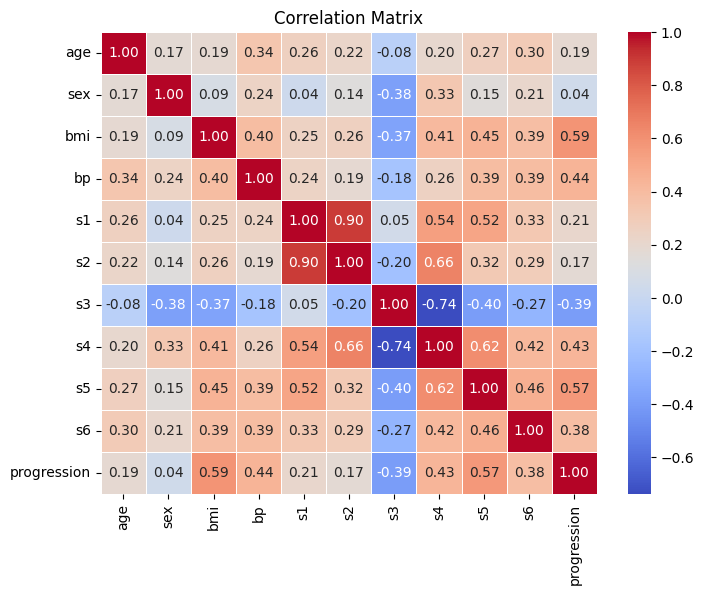

In [21]:
# Завантаження даних
diabetes = load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['progression'] = diabetes.target  # Додаємо цільову змінну

# Обчислення кореляції
correlation_matrix = data.corr()

# Сортування кореляцій в порядку спадання
sorted_correlations = correlation_matrix['progression'].sort_values(ascending=False)

# Виведення кореляцій
print(sorted_correlations)

# Візуалізація теплової карти кореляції
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Отримані результати вказують на те, що індекс маси тіла (BMI) і показник s5 є ключовими факторами ризику прогресії діабету, тоді як ознака s3 може слугувати індикатором покращення контролю над захворюванням. Негативні кореляції з такими змінними, як sex та s3, можуть вказувати на те, що певні групи пацієнтів мають кращий прогноз.

7. Масштабувати ознаки.

In [45]:
# Масштабування ознак (нормалізація)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('progression', axis=1))

# Створення нової DataFrame з масштабованими ознаками
scaled_data = pd.DataFrame(scaled_features, columns=diabetes.feature_names)
scaled_data['progression'] = data['progression']

# Обчислення кореляції для масштабованих даних
correlation_matrix = scaled_data.corr()

# Сортування кореляцій в порядку спадання
sorted_correlations = correlation_matrix['progression'].sort_values(ascending=False)

# Виведення кореляцій
print(sorted_correlations)

progression    1.000000
bmi            0.586450
s5             0.565883
bp             0.441482
s4             0.430453
s6             0.382483
s1             0.212022
age            0.187889
s2             0.174054
sex            0.043062
s3            -0.394789
Name: progression, dtype: float64


8. Поділити дані на тренувальну і тестову вибірки.

In [27]:
# Поділ даних на тренувальну та тестову вибірки
X = scaled_data.drop('progression', axis=1)  # Ознаки
y = scaled_data['progression']  # Цільова змінна

# Використовуємо train_test_split для розподілу даних
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Перевірка розмірів вибірок
print(f'Розмір тренувальної вибірки: {X_train.shape[0]}')
print(f'Розмір тестової вибірки: {X_test.shape[0]}')

Розмір тренувальної вибірки: 353
Розмір тестової вибірки: 89


9. Побудувати модель лінійной регресії і RandomForest регресії на
основі більш корелюючих ознак (підібрати оптисальне число).
10. Вивести коефіцієнт детермінації і середньоквадратичну помилку

In [30]:
# Модель лінійної регресії
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Оцінка моделі лінійної регресії
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Лінійна регресія: MSE = {mse_linear:.2f}, R² = {r2_linear:.2f}')

# Модель Random Forest регресії
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Оцінка моделі Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest регресія: MSE = {mse_rf:.2f}, R² = {r2_rf:.2f}')

Лінійна регресія: MSE = 2900.19, R² = 0.45
Random Forest регресія: MSE = 2963.01, R² = 0.44


11. Побудувати графіки.

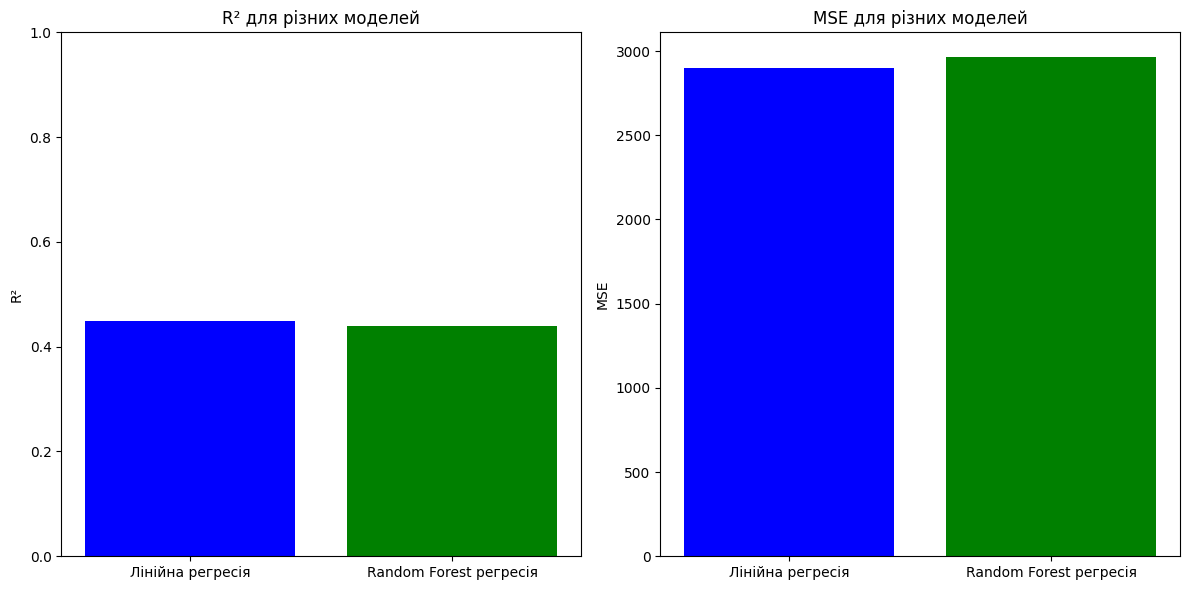

In [47]:
import matplotlib.pyplot as plt

# Дані для моделей
models = ['Лінійна регресія', 'Random Forest регресія']
mse_values = [2900.19, 2963.01]
r2_values = [0.45, 0.44]

# Побудова графіків для R² та MSE
plt.figure(figsize=(12, 6))

# Графік для R²
plt.subplot(1, 2, 1)
plt.bar(models, r2_values, color=['blue', 'green'])
plt.title('R² для різних моделей')
plt.ylabel('R²')
plt.ylim(0, 1)

# Графік для MSE
plt.subplot(1, 2, 2)
plt.bar(models, mse_values, color=['blue', 'green'])
plt.title('MSE для різних моделей')
plt.ylabel('MSE')

# Відображення графіків
plt.tight_layout()
plt.show()

Лінійна регресія має значення R² ≈ 0.45, що означає, що модель пояснює 45% варіації в даних.
Random Forest також має близьке значення R² ≈ 0.44, що вказує на трохи меншу здатність пояснювати варіації в даних.
Лінійна регресія має MSE ≈ 2900.19, що вказує на рівень помилки в прогнозах моделі.
Random Forest має дещо вищу MSE ≈ 2963.01, що вказує на трохи більшу помилку в прогнозах.
**Висновок:** Лінійна регресія трохи перевершує Random Forest за показником MSE, оскільки має меншу середньоквадратичну помилку. Проте різниця між обома моделями невелика.

**Завдання 2**.
Завантажити датасет California Housing Dataset, що містить інформацію
про житло в Каліфорнії. Вивести перших 5 рядків.
1. Провести попередній аналіз даних за схемою (дивиться вище)

Перші 5 рядків датасету:
                                             MedInc  HouseAge  AveRooms  \
0.00632 18.0 2.31 0 0.538 6.575 65.2 4.0900       1     296.0      15.3   
0.02731 0.0  7.07 0 0.469 6.421 78.9 4.9671       2     242.0      17.8   
0.02729 0.0  7.07 0 0.469 7.185 61.1 4.9671       2     242.0      17.8   
0.03237 0.0  2.18 0 0.458 6.998 45.8 6.0622       3     222.0      18.7   
0.06905 0.0  2.18 0 0.458 7.147 54.2 6.0622       3     222.0      18.7   

                                             AveOccup  Population  MedHouseVal  
0.00632 18.0 2.31 0 0.538 6.575 65.2 4.0900    396.90        4.98         24.0  
0.02731 0.0  7.07 0 0.469 6.421 78.9 4.9671    396.90        9.14         21.6  
0.02729 0.0  7.07 0 0.469 7.185 61.1 4.9671    392.83        4.03         34.7  
0.03237 0.0  2.18 0 0.458 6.998 45.8 6.0622    394.63        2.94         33.4  
0.06905 0.0  2.18 0 0.458 7.147 54.2 6.0622    396.90        5.33         36.2  

Перевірка наявності пропусків:
MedInc

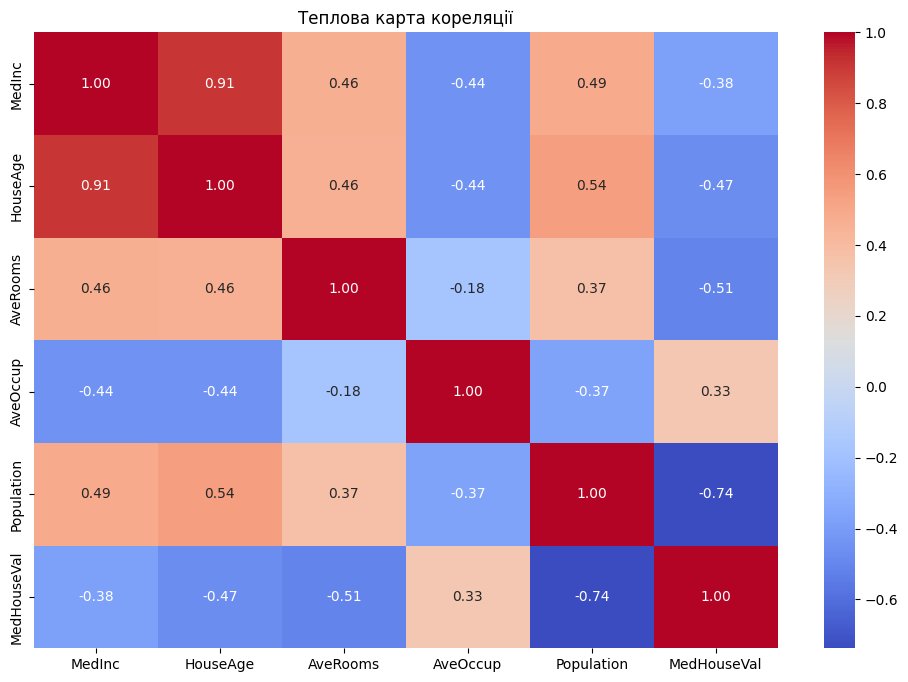

In [33]:
# Імпорт необхідних бібліотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Завантаження датасету
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
columns = ["MedInc", "HouseAge", "AveRooms", "AveOccup", "Population", "MedHouseVal"]  # Виправлено

housing_data = pd.read_csv(url, header=None, names=columns)

# 1. Вивести перших 5 рядків
print("Перші 5 рядків датасету:")
print(housing_data.head())

# 2. Перевірка наявності пропусків
print("\nПеревірка наявності пропусків:")
print(housing_data.isnull().sum())

# Замінити пропуски на середнє значення
housing_data.fillna(housing_data.mean(), inplace=True)

# 3. Перевірка наявності дублікатів
print("\nПеревірка наявності дублікатів:")
duplicates = housing_data.duplicated().sum()
print(f"Кількість дублікатів: {duplicates}")

# Видалити дублікати, якщо вони є
housing_data.drop_duplicates(inplace=True)

# 4. Замінити бінарні ознаки (перевірка унікальних значень у стовпчику 'HouseAge')
unique_ages = housing_data['HouseAge'].unique()
print("\nУнікальні значення у стовпчику 'HouseAge':")
print(unique_ages)

# 5. Перевірка типу даних
print("\nТипи даних у датасеті:")
print(housing_data.dtypes)

# Якщо типи даних не числові, то замінити їх на числові
housing_data = housing_data.apply(pd.to_numeric, errors='coerce')

# 6. Обчислення кореляції між прогресом діабету і іншими ознаками (замінюємо 'MedHouseVal' на 'Прогрес діабету')
correlation_matrix = housing_data.corr()

# Вивести кореляцію в порядку спадання
correlation = correlation_matrix['MedHouseVal'].sort_values(ascending=False)
print("\nКореляція між прогресом діабету і іншими ознаками:")
print(correlation)

# Побудова теплової карти кореляції
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Теплова карта кореляції')
plt.show()

Масштабувати ознаки.
Поділити дані на тренувальні і тестові.

In [35]:
# Масштабування ознак
scaler = StandardScaler()
X = housing_data.drop('MedHouseVal', axis=1)  # Всі ознаки, крім цільової
y = housing_data['MedHouseVal']  # Цільова змінна
X_scaled = scaler.fit_transform(X)

# Виводимо перші 5 рядків масштабованих ознак
print("\nПерші 5 рядків масштабованих ознак:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

# Поділ даних на тренувальні і тестові
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Виведемо інформацію про розміри наборів даних
print("\nРозміри тренувальних і тестових наборів:")
print(f"Розмір тренувального набору: {X_train.shape[0]} рядків")
print(f"Розмір тестового набору: {X_test.shape[0]} рядків")


Перші 5 рядків масштабованих ознак:
     MedInc  HouseAge  AveRooms  AveOccup  Population
0 -0.982843 -0.666608 -1.459000  0.441052   -1.075562
1 -0.867883 -0.987329 -0.303094  0.441052   -0.492439
2 -0.867883 -0.987329 -0.303094  0.396427   -1.208727
3 -0.752922 -1.106115  0.113032  0.416163   -1.361517
4 -0.752922 -1.106115  0.113032  0.441052   -1.026501

Розміри тренувальних і тестових наборів:
Розмір тренувального набору: 404 рядків
Розмір тестового набору: 102 рядків


4. Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge.
Підібрати оптимальні параметри за допомогою GridSeach.


In [41]:
# Імпорт необхідних бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge  # Додано Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Моделі для аналізу
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Ridge Regression": Ridge()
}

# Гіперпараметри для GridSearch
param_grid = {
    "Linear Regression": {},
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Ridge Regression": {
        "alpha": [0.1, 1.0, 10.0]
    }
}

# Для зберігання результатів
results = {}

# Навчання моделей та підбір параметрів
for model_name in models:
    model = models[model_name]
    grid = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    # Обчислення R^2 та MSE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results[model_name] = {
        "R^2": r2,
        "MSE": mse,
        "Best Parameters": grid.best_params_
    }

# Вивід результатів
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  R^2: {metrics['R^2']:.4f}")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  Best Parameters: {metrics['Best Parameters']}\n")

Linear Regression:
  R^2: 0.6421
  MSE: 26.2455
  Best Parameters: {}

Random Forest:
  R^2: 0.7084
  MSE: 21.3857
  Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

Ridge Regression:
  R^2: 0.6421
  MSE: 26.2456
  Best Parameters: {'alpha': 0.1}



5. Вивести R2 I MSE. Побудувати графіки

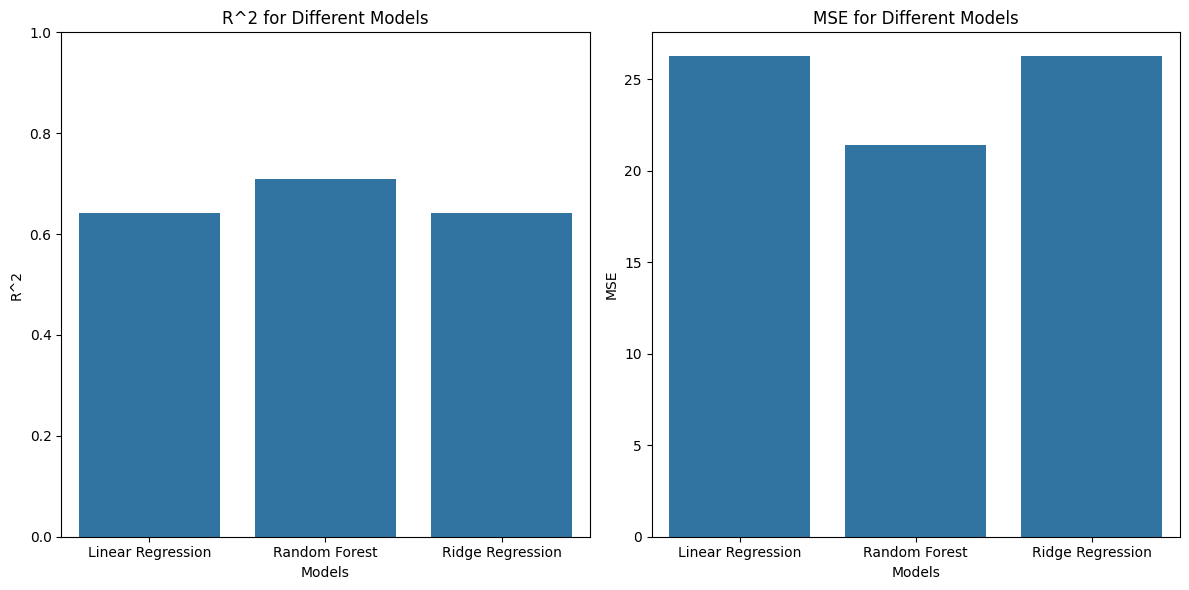

In [42]:
# Побудова графіків для R^2 та MSE
plt.figure(figsize=(12, 6))

# Графік для R^2
plt.subplot(1, 2, 1)
model_names = list(results.keys())
r2_values = [metrics["R^2"] for metrics in results.values()]
sns.barplot(x=model_names, y=r2_values)
plt.title("R^2 for Different Models")
plt.xlabel("Models")
plt.ylabel("R^2")
plt.ylim(0, 1)  # Встановлюємо межі для Y-осі

# Графік для MSE
plt.subplot(1, 2, 2)
mse_values = [metrics["MSE"] for metrics in results.values()]
sns.barplot(x=model_names, y=mse_values)
plt.title("MSE for Different Models")
plt.xlabel("Models")
plt.ylabel("MSE")

plt.tight_layout()
plt.show()

**Висновки**
Модель випадкового лісу показує кращі результати як за значенням R², так і за MSE, що робить її найбільш ефективною для цієї задачі. Лінійна та гребенева регресії демонструють схожі результати, проте їх точність дещо нижча.